In [178]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier


import warnings
warnings.filterwarnings('ignore')

In [179]:
# read the data
train = pd.read_csv('train_LZdllcl.csv')
test= pd.read_csv('test_2umaH9m.csv')

In [180]:
# total no.of rose and columns
train.shape, test.shape

((54808, 14), (23490, 13))

In [181]:
train.columns = (
    train.columns.str.strip()  # Remove leading/trailing spaces
    .str.replace(' ', '_')  # Replace spaces with underscores
    .str.replace('>', 'gt_')  # Replace '>' with 'gt_'
    .str.replace(r'\?', '', regex=True)  # Remove '?' characters
    .str.replace(r'\%', '', regex=True)  # Remove '?' characters
)

# Verify the cleaned column names
print(train.columns)  # Place this here to inspect the cleaned column names

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_gt_80', 'awards_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')


In [182]:
# get the dataypes
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met_gt_80            int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [183]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met_gt_80        54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [184]:
# to see the first few rows
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [185]:
# chk missind data
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met_gt_80             0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [186]:
train.isna().sum()/train.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met_gt_80          0.000000
awards_won              0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [187]:
# percentage of missing data in each column
(train.isna().sum()/train.shape[0]*100).sort_values()

employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met_gt_80          0.000000
awards_won              0.000000
avg_training_score      0.000000
is_promoted             0.000000
education               4.395344
previous_year_rating    7.524449
dtype: float64

In [188]:
# percentage of missing data in each column
(train.isna().sum()/train.shape[0]*100).sort_values()

employee_id             0.000000
department              0.000000
region                  0.000000
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
length_of_service       0.000000
KPIs_met_gt_80          0.000000
awards_won              0.000000
avg_training_score      0.000000
is_promoted             0.000000
education               4.395344
previous_year_rating    7.524449
dtype: float64

In [189]:
# to check duplicates
train.duplicated().sum()

0

In [190]:
# check target data
train.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [191]:
train.is_promoted.value_counts(normalize=True)*100

is_promoted
0    91.482995
1     8.517005
Name: proportion, dtype: float64

<Axes: xlabel='is_promoted'>

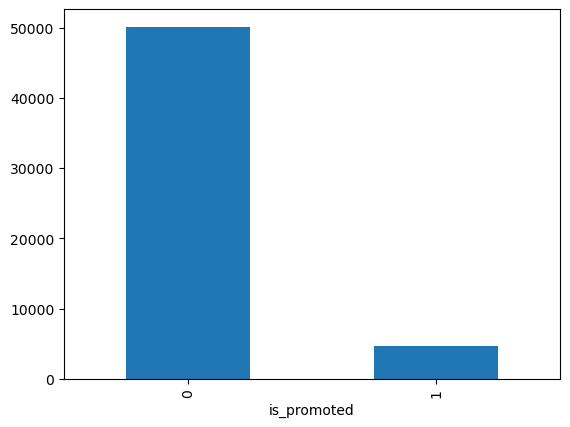

In [192]:
train.is_promoted.value_counts().plot(kind='bar')

In [193]:
tgt_col = ['is_promoted']
ign_cols = ['employee_id']

In [194]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met_gt_80,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [195]:
train.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met_gt_80,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [196]:
train.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [197]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met_gt_80              2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

In [198]:
# check unique values

for col in train.drop(columns=ign_cols).columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 5 => [ 5.  3.  1.  4. nan  2.]
length_of_service 35 => [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17

In [199]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='avg_training_score', ylabel='Density'>

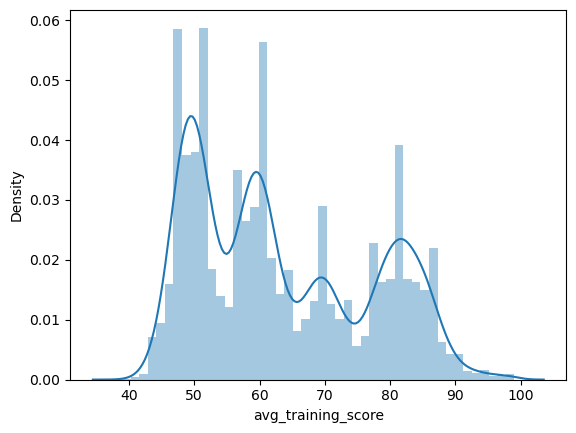

In [200]:
sns.distplot(train.avg_training_score)

<Axes: xlabel='length_of_service', ylabel='Density'>

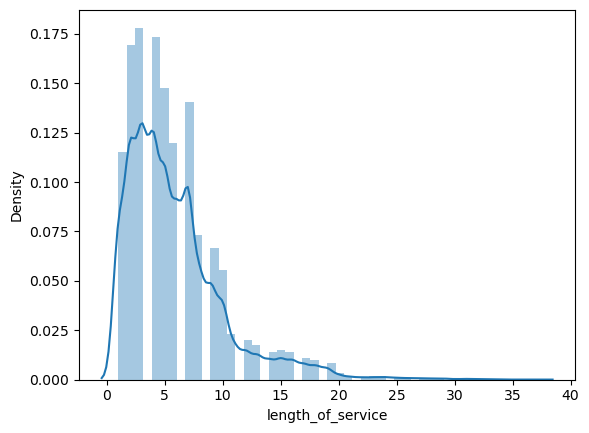

In [201]:
sns.distplot(train.length_of_service)

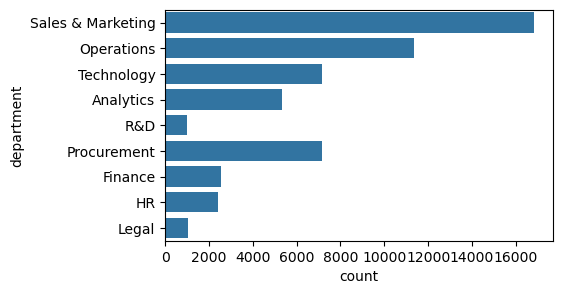

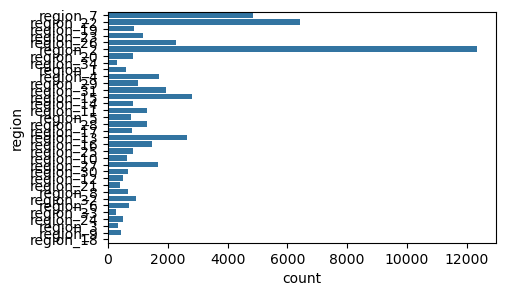

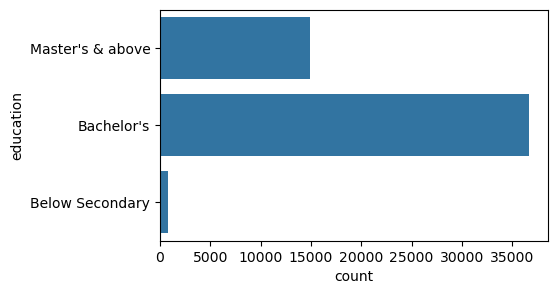

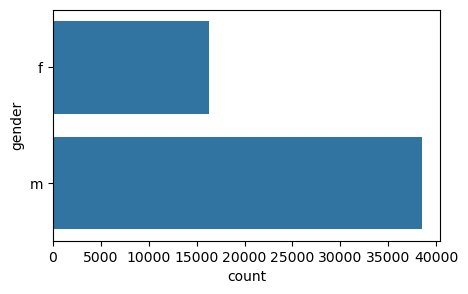

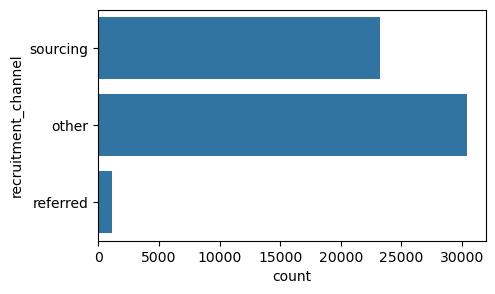

In [202]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

<Axes: ylabel='department,is_promoted'>

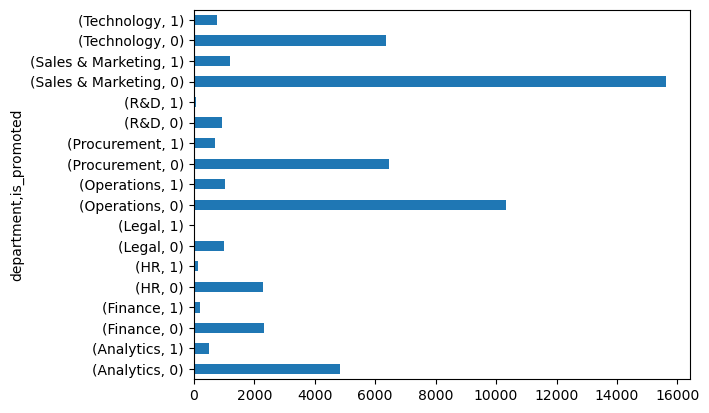

In [203]:
train[['department','is_promoted']].groupby('department').value_counts().plot(kind='barh')

In [204]:
dep_tgt = train[['department','is_promoted']].groupby('department').value_counts().unstack()
dep_tgt['%'] = dep_tgt[1]/(dep_tgt[0]+dep_tgt[1])*100
dep_tgt.sort_values(dep_tgt.columns[2], ascending=False)

is_promoted,0,1,%
department,,,
Technology,6370,768,10.759316
Procurement,6450,688,9.638554
Analytics,4840,512,9.566517
Operations,10325,1023,9.014804
Finance,2330,206,8.123028
Sales & Marketing,15627,1213,7.203088
R&D,930,69,6.906907
HR,2282,136,5.624483
Legal,986,53,5.101059


In [205]:
#Preprocessing

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [206]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met_gt_80            int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [207]:
# separate category and numeric features

cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
num_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met_gt_80', 'awards_won', 'avg_training_score']


In [208]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['is_promoted']
['employee_id']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met_gt_80', 'awards_won', 'avg_training_score']


In [209]:
#Pipelining

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [210]:
cat_pipe_encode

Pipeline(steps=[('impute_cat', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [211]:
num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])


In [212]:
preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [213]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [214]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [215]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60


In [216]:
y = train[tgt_col]
y.head(2)

,is_promoted
0,0
1,0


In [217]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [218]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((43846, 12), (10962, 12), (43846, 1), (10962, 1))

In [219]:
train_y.value_counts(),val_y.value_counts()

(is_promoted
 0              40086
 1               3760
 Name: count, dtype: int64,
 is_promoted
 0              10054
 1                908
 Name: count, dtype: int64)

In [220]:
train_y.value_counts(normalize=True),val_y.value_counts(normalize=True)

(is_promoted
 0              0.914245
 1              0.085755
 Name: proportion, dtype: float64,
 is_promoted
 0              0.917168
 1              0.082832
 Name: proportion, dtype: float64)

In [221]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [222]:
model_pipeline_2 = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('classifier', RandomForestClassifier())
    ]
)
model_pipeline_2.fit(train_X, train_y)
y_pred_random = model_pipeline_2.predict(val_X)

In [223]:
from sklearn.metrics import accuracy_score, f1_score
print(f"Accuracy: {accuracy_score(val_y, y_pred_random)}")
print(f"F1 Score: {f1_score(val_y, y_pred_random)}")
print(f"Report: {classification_report(val_y, y_pred_random)}")

Accuracy: 0.934227330779055
F1 Score: 0.4095004095004095
Report:               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.41       908

    accuracy                           0.93     10962
   macro avg       0.87      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [224]:
train_pred = model_pipeline_2.predict(train_X)
test_pred = model_pipeline_2.predict(val_X)


In [225]:
print(f"Accuracy: {accuracy_score(val_y, y_pred_random)}")
print(f"F1 Score: {f1_score(val_y, y_pred_random)}")


Accuracy: 0.934227330779055
F1 Score: 0.4095004095004095


In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [227]:
model_pipeline.predict_proba(val_X)

array([[0.99348085, 0.00651915],
       [0.98677452, 0.01322548],
       [0.96228306, 0.03771694],
       ...,
       [0.80533318, 0.19466682],
       [0.9866604 , 0.0133396 ],
       [0.96721416, 0.03278584]])

In [228]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.99348085, 0.98677452, 0.96228306, ..., 0.80533318, 0.9866604 ,
       0.96721416])

In [229]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.00651915, 0.01322548, 0.03771694, ..., 0.19466682, 0.0133396 ,
       0.03278584])

In [230]:
model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [231]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n') 

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()

Train AUC
0.6279450179454598
Valid AUC
0.6224673108824682
Train cnf_matrix
[[39885   201]
 [ 2779   981]]
Valid cnf_matrix
[[9992   62]
 [ 680  228]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     40086
           1       0.83      0.26      0.40      3760

    accuracy                           0.93     43846
   macro avg       0.88      0.63      0.68     43846
weighted avg       0.93      0.93      0.92     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.79      0.25      0.38       908

    accuracy                           0.93     10962
   macro avg       0.86      0.62      0.67     10962
weighted avg       0.92      0.93      0.92     10962



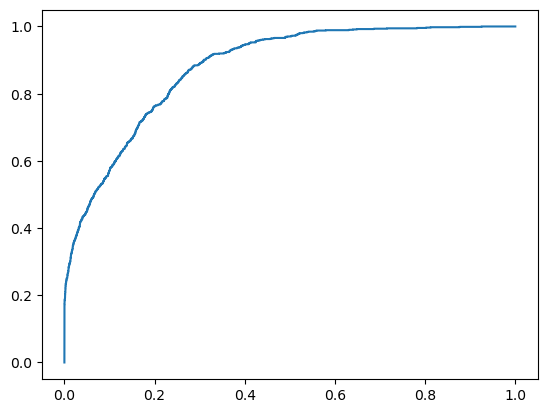

In [232]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

Train AUC
0.9987657719413898
Valid AUC
0.634532116877233
Train cnf_matrix
[[40083     3]
 [    9  3751]]
Valid cnf_matrix
[[9991   63]
 [ 658  250]]
Train cls_rep
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.41       908

    accuracy                           0.93     10962
   macro avg       0.87      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



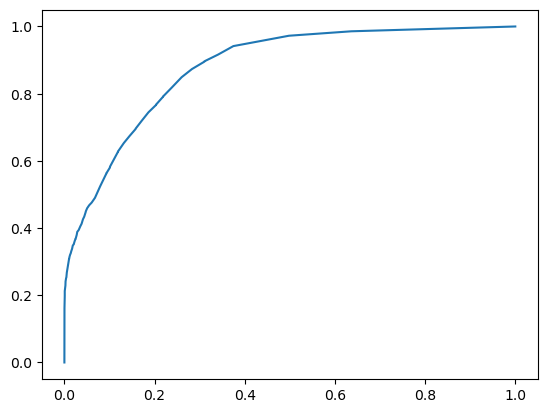

In [233]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline_2)

In [234]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

In [235]:
train_pred = model_pipeline_2.predict(train_X)
test_pred = model_pipeline_2.predict(test_X)

In [236]:
print("Train Accuracy : ",accuracy_score(train_y, train_pred))
print("Test Accuracy : ",accuracy_score(test_y, test_pred))

Train Accuracy :  0.9997263148291748
Test Accuracy :  0.934227330779055


In [237]:
print("Train Report : \n",classification_report(train_y, train_pred))
print("Test Report : \n",classification_report(test_y, test_pred))

Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

Test Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.41       908

    accuracy                           0.93     10962
   macro avg       0.87      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [238]:
print("Train Accuracy : ",accuracy_score(train_y, train_pred))
print("Test Accuracy : ",accuracy_score(test_y, test_pred))

Train Accuracy :  0.9997263148291748
Test Accuracy :  0.934227330779055


In [239]:
print("Train Report : \n",classification_report(train_y, train_pred))
print("Test Report : \n",classification_report(test_y, test_pred))

Train Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40086
           1       1.00      1.00      1.00      3760

    accuracy                           1.00     43846
   macro avg       1.00      1.00      1.00     43846
weighted avg       1.00      1.00      1.00     43846

Test Report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.80      0.28      0.41       908

    accuracy                           0.93     10962
   macro avg       0.87      0.63      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [240]:
#Using Grid search to hyper tune the model

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

In [241]:
grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=5, scoring='f1')

In [242]:
grid.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met_gt_80',
                                                                          'awards_won',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5, penalty=None)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='f1')

In [243]:
grid.best_params_

{'model': LogisticRegression(C=0.5, penalty=None),
 'model__C': 0.5,
 'model__penalty': None}

In [244]:
res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': 'l2'}",0.384390,4
1,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 0.5, 'model__penalty': None}",0.411121,1
2,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': 'l2'}",0.405285,3
3,"{'model': LogisticRegression(C=0.5, penalty=None), 'model__C': 3, 'model__penalty': None}",0.411121,1


In [245]:
sub = pd.read_csv('sample_submission_M0L0uXE.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [246]:
test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [247]:
test.columns = (
    test.columns.str.strip()
    .str.replace(' ', '_')
    .str.replace('>', 'gt_')
    .str.replace(r'\?', '', regex=True)
    .str.replace(r'\%', '', regex=True)
)

In [248]:
train.columns.difference(test.columns)

Index(['is_promoted'], dtype='object')

In [249]:
# updating the existing target values with predicted values
sub['is_promoted'] = model_pipeline.predict(test)

In [250]:
sub.to_csv('sub_1.csv',index=False)

In [251]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [252]:
import joblib

In [253]:
joblib.dump(model_pipeline,'promo_pipeline_model.pkl')

['promo_pipeline_model.pkl']

In [254]:
#perform oversampling to balance the data set
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
over_sampling = RandomOverSampler()

In [255]:
import imblearn
imblearn.__version__

'0.11.0'

In [256]:
import sklearn
sklearn.__version__

'1.2.2'

In [257]:
train_y.value_counts()

is_promoted
0              40086
1               3760
Name: count, dtype: int64

In [258]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [259]:
under_sampling = RandomUnderSampler()
train_X_us, train_y_us = under_sampling.fit_resample(train_X,train_y)

In [260]:
train_y_us.value_counts()

is_promoted
0              3760
1              3760
Name: count, dtype: int64

In [261]:
train_y_os.value_counts()

is_promoted
0              40086
1              40086
Name: count, dtype: int64

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [263]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]

In [264]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [265]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=5, scoring='f1')

In [266]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met_gt_80',
                                                                          'awards_won',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier(max_depth=5)],
                          'model__max_depth': [3, 5]}],
             scoring='f1')

In [267]:
grid_2.best_params_

{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}

In [268]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [269]:
grid_2.cv_results_

{'mean_fit_time': array([0.84061365, 0.82082024, 0.7994391 , 0.81922026, 0.37146277,
        0.46601591]),
 'std_fit_time': array([0.06819843, 0.06110305, 0.02975874, 0.05595041, 0.05203707,
        0.05112166]),
 'mean_score_time': array([0.04235501, 0.0498168 , 0.04696016, 0.05393372, 0.04369259,
        0.05014334]),
 'std_score_time': array([0.01050352, 0.00559675, 0.01403776, 0.00859898, 0.01160981,
        0.01170271]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(max_depth=5),
                    DecisionTreeClassifier(max_depth=5)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3, 3, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value='?',
             dtype=object),
 'param_model__pena

In [270]:
new_model = grid_2.best_estimator_

Train AUC
0.778188191929904
Valid AUC
0.787431679503369
Train cnf_matrix
[[26642 13444]
 [  407  3353]]
Valid cnf_matrix
[[6743 3311]
 [  87  821]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     40086
           1       0.20      0.89      0.33      3760

    accuracy                           0.68     43846
   macro avg       0.59      0.78      0.56     43846
weighted avg       0.92      0.68      0.75     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     10054
           1       0.20      0.90      0.33       908

    accuracy                           0.69     10962
   macro avg       0.59      0.79      0.56     10962
weighted avg       0.92      0.69      0.76     10962



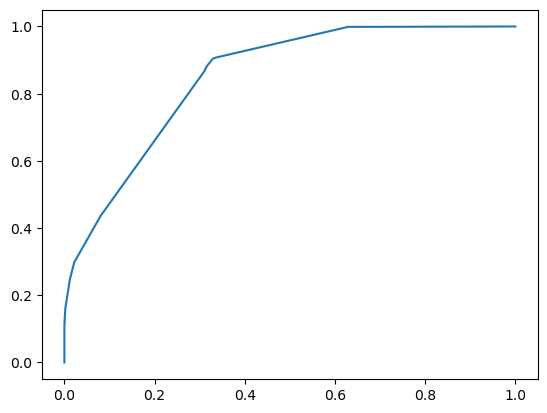

In [271]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.7775532604899468
Valid AUC
0.787431679503369
Train cnf_matrix
[[26642 13444]
 [ 4390 35696]]
Valid cnf_matrix
[[6743 3311]
 [  87  821]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.86      0.66      0.75     40086
           1       0.73      0.89      0.80     40086

    accuracy                           0.78     80172
   macro avg       0.79      0.78      0.77     80172
weighted avg       0.79      0.78      0.77     80172

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     10054
           1       0.20      0.90      0.33       908

    accuracy                           0.69     10962
   macro avg       0.59      0.79      0.56     10962
weighted avg       0.92      0.69      0.76     10962



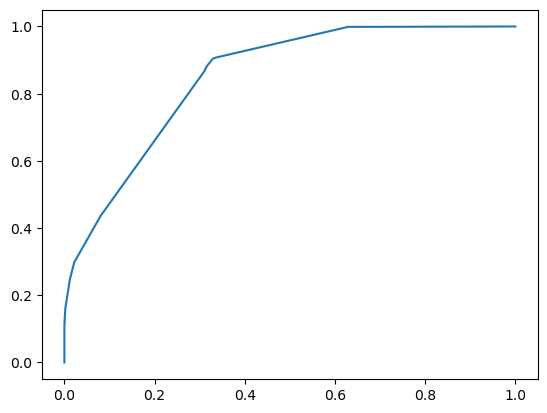

In [272]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

In [273]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.788917,5
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.789039,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.789202,2
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.789039,3
4,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 3}",0.754695,6
5,"{'model': DecisionTreeClassifier(max_depth=5), 'model__max_depth': 5}",0.800229,1


In [274]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [275]:
sub['is_promoted'] = new_model.predict(test)
sub.to_csv('newmodel_sub.csv',index=False)


In [276]:
new_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('model', DecisionTreeClassifier(max_depth=5))])

In [277]:
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [278]:
sub = pd.read_csv('newmodel_sub.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0


In [279]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier

In [280]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }

]

In [281]:
params_3

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]},
 {'model': [StackingClassifier(estimators=[['sclf1', RandomForestClassifier()],
                                  ['sclf2', GradientBoostingClassifier()],
                                  ['sclf3', AdaBoostClassifier()]],
                      final_estimator=LogisticRegression())],
  'model__sclf1__max_depth': [4, 8],
  'model__sclf2__n_estimators': [15, 25],
  'model__sclf3__n_estimators': [5, 35]}]

In [282]:
print("Hello, world!")

Hello, world!


In [283]:
params_3

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]},
 {'model': [StackingClassifier(estimators=[['sclf1', RandomForestClassifier()],
                                  ['sclf2', GradientBoostingClassifier()],
                                  ['sclf3', AdaBoostClassifier()]],
                      final_estimator=LogisticRegression())],
  'model__sclf1__max_depth': [4, 8],
  'model__sclf2__n_estimators': [15, 25],
  'model__sclf3__n_estimators': [5, 35]}]

In [284]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [285]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, 
                    cv=2, scoring='f1',verbose=3)

In [288]:
grid_3.fit(train_X_os, train_y_os)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
[CV 1/2] END model=LogisticRegression(), model__C=0.5, model__penalty=l2;, score=0.792 total time=   0.4s
[CV 2/2] END model=LogisticRegression(), model__C=0.5, model__penalty=l2;, score=0.787 total time=   0.6s
[CV 1/2] END model=LogisticRegression(), model__C=0.5, model__penalty=None;, score=0.791 total time=   0.6s
[CV 2/2] END model=LogisticRegression(), model__C=0.5, model__penalty=None;, score=0.787 total time=   0.6s
[CV 1/2] END model=LogisticRegression(), model__C=3, model__penalty=l2;, score=0.792 total time=   0.6s
[CV 2/2] END model=LogisticRegression(), model__C=3, model__penalty=l2;, score=0.786 total time=   0.5s
[CV 1/2] END model=LogisticRegression(), model__C=3, model__penalty=None;, score=0.791 total time=   0.5s
[CV 2/2] END model=LogisticRegression(), model__C=3, model__penalty=None;, score=0.787 total time=   0.5s
[CV 1/2] END model=DecisionTreeClassifier(), model__max_depth=3;, score=0.754 total time=  

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier(max_depth=8)],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier(n_estimators=15)],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier(n_estimators=5)]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='f1', verbose=3)

In [289]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)],
                                ['sclf2',
                                 GradientBoostingClassifier(n_estimators=15)],
                                ['sclf3', AdaBoostClassifier(n_estimators=5)]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 15,
 'model__sclf3__n_estimators': 5}

In [290]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale'...
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=15)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=5)]],
                                    final_estimator=LogisticRegression()))])

In [291]:
new_model_3 = grid_3.best_estimator_

Train AUC
0.795165726135617
Valid AUC
0.7677047248821124
Train cnf_matrix
[[28888 11198]
 [  490  3270]]
Valid cnf_matrix
[[7210 2844]
 [ 165  743]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     40086
           1       0.23      0.87      0.36      3760

    accuracy                           0.73     43846
   macro avg       0.60      0.80      0.60     43846
weighted avg       0.92      0.73      0.79     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     10054
           1       0.21      0.82      0.33       908

    accuracy                           0.73     10962
   macro avg       0.59      0.77      0.58     10962
weighted avg       0.91      0.73      0.79     10962



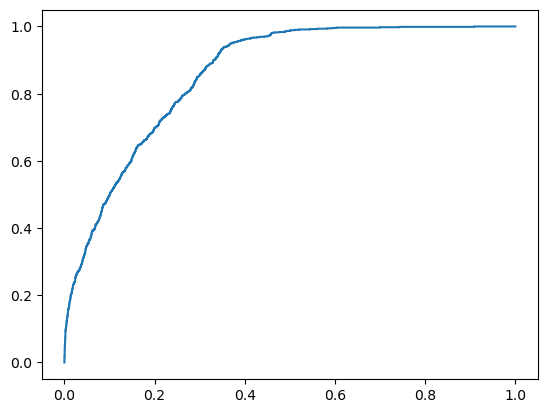

In [292]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_3)

In [293]:
res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.789648,9
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.788952,12
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.789200,11
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.788952,12
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.754483,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.800536,5
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 5}",0.789450,10
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 35}",0.792358,8
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 5}",0.798351,7
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 35}",0.798833,6


In [294]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model_3.predict(test)
sub.to_csv('result3.csv',index=False)

In [295]:
predictions=new_model_3.predict(test)

In [296]:
from sklearn.metrics import f1_score

new_model_3.fit(train_X, train_y)
predictions = new_model_3.predict(val_X)
f1 = f1_score(val_y, predictions, average='binary')  # or 'weighted' for multiclass
print(f"F1 Score: {f1}")

F1 Score: 0.3517587939698492


In [297]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((43846, 12), (10962, 12), (43846, 1), (10962, 1))

In [298]:
model_pipeline_2 = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('classifier', RandomForestClassifier())
    ]
)

In [299]:
param_grid = {
    'classifier__n_estimators' : [50, 100, 150, 200, 250, 300],
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'classifier__class_weight' : [None, "balanced", "balanced_subsample"]
}

In [300]:
grid_4 = GridSearchCV(estimator=model_pipeline_2, param_grid=param_grid, 
                    cv=2, scoring='f1',verbose=3)

In [301]:
print(grid_4.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#grid_4.fit(train_X_us, train_y_us)

In [ ]:
model_pipeline_2.feature_names_in_

In [ ]:
grid_4.best_params_

In [ ]:
grid_4.best_estimator_

In [ ]:
random_forest_model = grid_4.best_estimator_

In [ ]:
model_train_val_eval(train_X,val_X,train_y,val_y,random_forest_model)

In [ ]:
res_df_4 = pd.DataFrame(grid_4.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

In [ ]:
sub['is_promoted'] = random_forest_model.predict(test)
sub.to_csv('random_forest_model.csv',index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [346]:
adaboost = AdaBoostClassifier(n_estimators=200, random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=1)

In [347]:
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

In [348]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((43846, 12), (10962, 12), (43846, 1), (10962, 1))

In [349]:
model_pipeline_adaboost = Pipeline(
    steps=[
        ('preprocess', preprocess),  # Same preprocessing step
        ('classifier', AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=2),  # Weak learner
            n_estimators=100,  # Number of weak learners
            learning_rate=0.1,  # Contribution of each learner
            random_state=42     # Ensures reproducibility
        ))
    ]
)

In [350]:
model_pipeline_adaboost

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.1, n_estimators=100,
                                    random_state=42))])

In [351]:
model_pipeline_adaboost.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met_gt_80',
                                                   'awards_won',
                                                   'avg_training_score'])])),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.1, n_estimators=100,
                                    random_state=42))])

In [352]:
y_pred_adaboost = model_pipeline_adaboost.predict(val_X)

In [353]:
print("F1 Score:", f1_score(val_y, y_pred_adaboost))
print("Accuracy:", accuracy_score(val_y, y_pred_adaboost))
print("\nClassification Report:\n", classification_report(val_y, y_pred_adaboost))

F1 Score: 0.43344709897610917
Accuracy: 0.939427111840905

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.96      0.28      0.43       908

    accuracy                           0.94     10962
   macro avg       0.95      0.64      0.70     10962
weighted avg       0.94      0.94      0.92     10962



In [354]:
param_grid_ada_boost = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__base_estimator__max_depth': [1, 2, 3]
}

In [355]:
grid_5 = GridSearchCV(estimator=model_pipeline_adaboost, param_grid=param_grid_ada_boost, 
                    cv=2, scoring='f1',verbose=3)

In [356]:
grid_5.fit(train_X_os, train_y_os)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END classifier__base_estimator__max_depth=1, classifier__learning_rate=0.01, classifier__n_estimators=50;, score=0.686 total time=   3.5s
[CV 2/2] END classifier__base_estimator__max_depth=1, classifier__learning_rate=0.01, classifier__n_estimators=50;, score=0.686 total time=   3.6s
[CV 1/2] END classifier__base_estimator__max_depth=1, classifier__learning_rate=0.01, classifier__n_estimators=100;, score=0.718 total time=   7.0s
[CV 2/2] END classifier__base_estimator__max_depth=1, classifier__learning_rate=0.01, classifier__n_estimators=100;, score=0.718 total time=   6.9s
[CV 1/2] END classifier__base_estimator__max_depth=1, classifier__learning_rate=0.01, classifier__n_estimators=150;, score=0.718 total time=  10.3s
[CV 2/2] END classifier__base_estimator__max_depth=1, classifier__learning_rate=0.01, classifier__n_estimators=150;, score=0.719 total time=  10.2s
[CV 1/2] END classifier__base_estimator__max_depth=1,

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                                          'KPIs_met_gt_80',
                                                                          'awards_won',
                                                                          'avg_training_score'])])),
                                       ('classifier',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                           learning_rate=0.1,
                                                           n_estimators=100,
                                                           random_state=42))]),
             param_grid={'classifier__base_estimator__max_depth': [1, 2, 3],
                         'classifier__learning_rate': [0.01, 0.1, 1],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='f1', verbose=3)

In [357]:
adaboost_model = grid_5.best_estimator_

Train AUC
0.8756777847839909
Valid AUC
0.783874785409888
Train cnf_matrix
[[33040  7046]
 [  274  3486]]
Valid cnf_matrix
[[8122 1932]
 [ 218  690]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     40086
           1       0.33      0.93      0.49      3760

    accuracy                           0.83     43846
   macro avg       0.66      0.88      0.69     43846
weighted avg       0.94      0.83      0.86     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     10054
           1       0.26      0.76      0.39       908

    accuracy                           0.80     10962
   macro avg       0.62      0.78      0.64     10962
weighted avg       0.91      0.80      0.84     10962



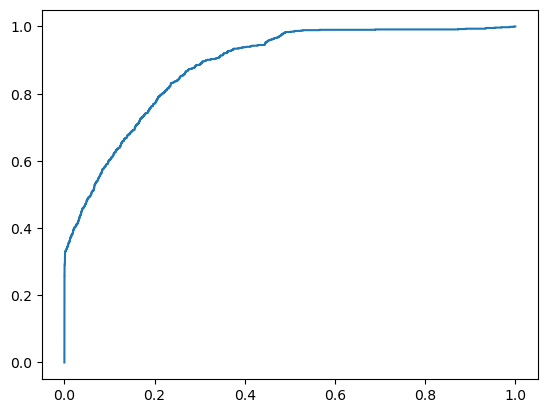

In [358]:
model_train_val_eval(train_X,val_X,train_y,val_y,adaboost_model)

In [ ]:
# updating the existing target values with predicted values
sub['is_promoted'] = adaboost_model.predict(test)
sub.to_csv('adaboost.csv',index=False)


In [ ]:
grid_5.fit(train_X_us, train_y_us)

In [ ]:
adaboost_model = grid_5.best_estimator_

In [ ]:
model_train_val_eval(train_X,val_X,train_y,val_y,adaboost_model)

In [ ]:

import xgboost as xgb
from xgboost import XGBClassifier

In [307]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__scale_pos_weight': [1, 2, 5]
}

In [303]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
from xgboost import XGBClassifier
model_pipeline_xgboost = Pipeline(
    steps=[
        ('smote', smote),  # Balance classes using SMOTE
        ('preprocess', preprocess),  # Preprocessing pipeline
        ('classifier', XGBClassifier(
            n_estimators=200,  # Number of boosting rounds
            learning_rate=0.1,  # Learning rate
            max_depth=5,  # Maximum depth of each tree
            subsample=0.8,  # Subsample ratio
            colsample_bytree=0.8,  # Feature subsampling ratio
            scale_pos_weight=1,  # Adjust for imbalance
            random_state=42,  # Reproducibility
            use_label_encoder=False  # Suppress warnings
        ))
    ]
)


#model_pipeline_adaboost = Pipeline(
 #   steps=[
  #      ('preprocess', preprocess),  # Same preprocessing step
   #     ('classifier', AdaBoostClassifier(
#        base_estimator=DecisionTreeClassifier(max_depth=2),  # Weak learner
#            n_estimators=100,  # Number of weak learners
#            learning_rate=0.1,  # Contribution of each learner
#            random_state=42     # Ensures reproducibility
#        ))
 #   ]
#)

In [304]:
from xgboost import XGBClassifier
model_pipeline_xgboost = Pipeline(
    steps=[
        ('preprocess', preprocess),  # Preprocessing pipeline
        ('classifier', XGBClassifier(
            n_estimators=200,  # Number of boosting rounds
            learning_rate=0.1,  # Learning rate
            max_depth=5,  # Maximum depth of each tree
            subsample=0.8,  # Subsample ratio
            colsample_bytree=0.8,  # Feature subsampling ratio
            scale_pos_weight=1,  # Adjust for imbalance
            random_state=42,  # Reproducibility
            use_label_encoder=False  # Suppress warnings
        ))
    ]
)


In [305]:
model_pipeline_xgboost

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [345]:
!pip install xgboost

In [308]:
grid_6 = GridSearchCV(estimator=model_pipeline_xgboost, param_grid=param_grid_xgb, 
                    cv=2, scoring='f1',verbose=3)

In [309]:
grid_6.fit(train_X, train_y)

Fitting 2 folds for each of 729 candidates, totalling 1458 fits
[CV 1/2] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.6;, score=0.133 total time=   0.3s
[CV 2/2] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.6;, score=0.143 total time=   0.1s
[CV 1/2] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.8;, score=0.136 total time=   0.1s
[CV 2/2] END classifier__colsample_bytree=0.6, classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__scale_pos_weight=1, classifier__subsample=0.8;, score=0.146 total time=   0.1s
[CV 1/2] END classifier__colsample_b

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                                                      n_estimators=200,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__scale_pos_weight': [1, 2, 5],
                         'classifier__subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=3)

In [ ]:
train_y_us.value_counts()

In [ ]:
train_y_os.value_counts()

In [310]:
model_pipeline_xgboost.fit(train_X_us, train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [311]:
grid_6.best_params_

{'classifier__colsample_bytree': 0.6,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 300,
 'classifier__scale_pos_weight': 2,
 'classifier__subsample': 0.6}

In [312]:
grid_6.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [313]:
xgbmodel = grid_6.best_estimator_

Train AUC
0.7306454155480611
Valid AUC
0.6874136272060389
Train cnf_matrix
[[39771   315]
 [ 1996  1764]]
Valid cnf_matrix
[[9936  118]
 [ 557  351]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     40086
           1       0.85      0.47      0.60      3760

    accuracy                           0.95     43846
   macro avg       0.90      0.73      0.79     43846
weighted avg       0.94      0.95      0.94     43846

Valid cls rep
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.75      0.39      0.51       908

    accuracy                           0.94     10962
   macro avg       0.85      0.69      0.74     10962
weighted avg       0.93      0.94      0.93     10962



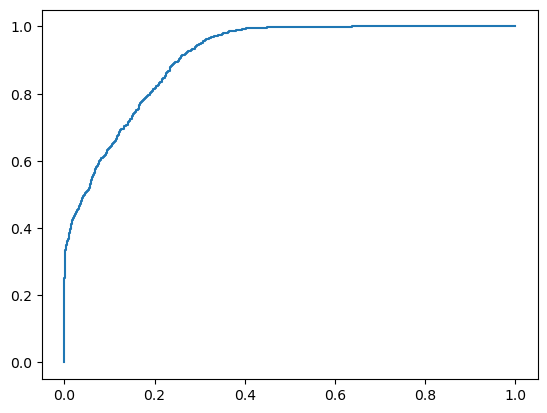

In [314]:
model_train_val_eval(train_X,val_X,train_y,val_y,xgbmodel)

In [315]:

res_df_6 = pd.DataFrame(grid_6.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_6[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.6}",0.138139,728
1,"{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 0.8}",0.140901,727
2,"{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 1, 'classifier__subsample': 1.0}",0.138139,728
3,"{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 2, 'classifier__subsample': 0.6}",0.165852,720
4,"{'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 2, 'classifier__subsample': 0.8}",0.167557,717
...,...,...,...
724,"{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 2, 'classifier__subsample': 0.8}",0.496393,264
725,"{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 2, 'classifier__subsample': 1.0}",0.505221,165
726,"{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 5, 'classifier__subsample': 0.6}",0.473640,466
727,"{'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 5, 'classifier__subsample': 0.8}",0.478509,407


In [316]:
# updating the existing target values with predicted values
sub['is_promoted'] = xgbmodel.predict(test)
sub.to_csv('xgbmodel.csv',index=False)

In [320]:
y_pred_xgbboost = xgbmodel.predict(val_X)

In [321]:
print("F1 Score:", f1_score(val_y, y_pred_xgbboost))
print("Accuracy:", accuracy_score(val_y, y_pred_xgbboost))
print("\nClassification Report:\n", classification_report(val_y, y_pred_xgbboost))

F1 Score: 0.5098039215686274
Accuracy: 0.9384236453201971

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.75      0.39      0.51       908

    accuracy                           0.94     10962
   macro avg       0.85      0.69      0.74     10962
weighted avg       0.93      0.94      0.93     10962



In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf1 = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, n_estimators=50)
clf2 = GradientBoostingClassifier() 
clf3 = xgb.XGBClassifier(eval_metric='auc')

voting_model = VotingClassifier(estimators=[('rf', clf1), ('gbm', clf2), ('lr', clf3)], voting='soft')

In [ ]:
param_grid_vote = {
    'voting_clf__rf__n_estimators': [100, 200],
    'voting_clf__rf__max_depth': [10, 20],
    'voting_clf__rf__class_weight': ['balanced'],

    'voting_clf__gbm__n_estimators': [100, 150],
    'voting_clf__gbm__learning_rate': [0.05, 0.1],
    'voting_clf__gbm__max_depth': [3, 5],

    'voting_clf__xgb__n_estimators': [100, 150],
    'voting_clf__xgb__learning_rate': [0.05, 0.1],
    'voting_clf__xgb__max_depth': [3, 5],
    'voting_clf__xgb__scale_pos_weight': [1, 2]
}

In [ ]:
voting_model = VotingClassifier(
    estimators=[('rf', clf1), ('gbm', clf2), ('xgb', clf3)], voting='soft'
)

In [ ]:
voting_pipeline = ImbPipeline([  # Address class imbalance
    ('preprocess', preprocess),        # Preprocessing pipeline
    ('voting_clf', voting_model)       # Voting classifier
])

In [ ]:
grid_search = GridSearchCV(
    estimator=voting_pipeline, 
    param_grid=param_grid_vote, 
    cv=2, 
    scoring='f1', 
    verbose=3
)

In [ ]:
##grid_search.fit(train_X, train_y)

In [343]:
joblib.dump(xgbmodel,'jobpromo_pipeline_xgbmodel.pkl')

['jobpromo_pipeline_xgbmodel.pkl']

In [344]:
joblib

<module 'joblib' from 'C:\\Users\\saike\\anaconda3\\Lib\\site-packages\\joblib\\__init__.py'>

In [339]:
train.iloc[5]
train.iloc[6]
train.iloc[7]
train.iloc[8]
train.iloc[9]
train.iloc[19]

employee_id                  54461
department              Operations
region                   region_15
education               Bachelor's
gender                           m
recruitment_channel          other
no_of_trainings                  1
age                             37
previous_year_rating           3.0
length_of_service                9
KPIs_met_gt_80                   0
awards_won                       0
avg_training_score              59
is_promoted                      0
Name: 19, dtype: object

In [340]:
filtered_data = train[train['education'] == 'Below Secondary']

In [341]:
sample_input = filtered_data.head()

In [342]:
print(sample_input)

     employee_id   department     region        education gender  \
210        11800  Procurement   region_2  Below Secondary      f   
272        35873        Legal   region_2  Below Secondary      m   
311        18651        Legal  region_22  Below Secondary      m   
318        67467      Finance   region_2  Below Secondary      f   
334        74579   Operations   region_2  Below Secondary      m   

    recruitment_channel  no_of_trainings  age  previous_year_rating  \
210               other                1   23                   1.0   
272               other                1   28                   NaN   
311               other                1   25                   5.0   
318               other                1   26                   3.0   
334               other                2   26                   NaN   

     length_of_service  KPIs_met_gt_80  awards_won  avg_training_score  \
210                  2               0           0                  69   
272             